# Compare multihit vs old

> NOTE
This notebook is just to compare between multihit vs non-multihit.

Files to check:
* Tracker: L2, L3
* CUD: CUD.h5
* Revan readable: cud2rr --> *.evta

## imports

In [1]:
import os
import numpy as np
import h5py


import matplotlib.pyplot as plt
#import tracker_pipeline
#import tracker_pipeline.conv_l2tol3_new as mh
from labellines import labelLine, labelLines

## initialization

In [14]:
f_data={
    "m_l2"   : "/Users/swasti/code/test_temp/multihit-gencud/2023-02-14_0932_9Layers_Cs137_L2.h5",
    "m_l3"   : "/Users/swasti/code/test_temp/multihit-gencud/2023-02-14_0932_9Layers_Cs137_L3.h5",
    "m_cud"  : "/Users/swasti/code/test_temp/multihit-gencud/2023-02-14_0932_9Layers_Cs137.CUD.h5",   
    "nm_l2"  : "/Users/swasti/code/test_temp/multihit-gencud/r184_021423_old/2023-02-14_0932_9Layers_Cs137_L2.h5",
    "nm_l3"  : "/Users/swasti/code/test_temp/multihit-gencud/r184_021423_old/2023-02-14_0932_9Layers_Cs137_L3.h5",
    "nm_cud" : "/Users/swasti/code/test_temp/multihit-gencud/r184_021423_old/2023-02-14_0932_9Layers_Cs137.CUD.h5",

}

In [15]:
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

# Tracker L2 Comparison

In [16]:
temp = f_data['m_l2']
m_l2 = h5py.File(temp,'r')

In [17]:
temp = f_data['nm_l2']
nm_l2 = h5py.File(temp,'r')

In [18]:
m_l2['layer00/vdata'].keys()

<KeysViewHDF5 ['channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

In [19]:
nm_l2['layer00/vdata/calib_data'].shape

(100674, 5)

In [20]:
m_l2_nrg = []
nm_l2_nrg = np.zeros(shape=(0,5))
for i in range(10):
    print(f"Layer: {i}")
    if layer_list[i] in m_l2.keys():
        nrg_data = m_l2[f"{layer_list[i]}/vdata/nrg"][...] # Grab data
        evtdata = m_l2[f"{layer_list[i]}/data/event_id"][...]  # Grab event id
        nrg_sync_index = m_l2[f"{layer_list[i]}/data/sync_index"][...] # grab sync_index
        
        nrg_arr = nrg_data[nrg_sync_index[1:],:,:]
        id_arr  = evtdata[nrg_sync_index[1:]]      
        print(nrg_arr.shape)
        
        m_l2_nrg.append(nrg_arr)
    
    if layer_list[i] in nm_l2.keys():
        nrg_data = nm_l2[f"{layer_list[i]}/vdata/calib_data"][...] # Grab data
        evtdata = nm_l2[f"{layer_list[i]}/data/event_id"][...]  # Grab event id
        nrg_sync_index = nm_l2[f"{layer_list[i]}/data/sync_index"][...] # grab sync_index
        
        evtid = evtdata[nrg_sync_index[1:]]                            #get sync indexed event ids.
        calid = nrg_data[:,0]

        # get common array indices
        temp_arr, cal_in, evt_in = np.intersect1d(calid, evtid, return_indices=True)
        cdata_fil = nrg_data[cal_in, ...]
        ar_len = cdata_fil.shape[0]
        
        if i == 0:
            nm_l2_nrg = cdata_fil
        else:
            nm_l2_nrg = np.append(nm_l2_nrg,cdata_fil, axis=0)
        print(nm_l2_nrg.shape)
        

Layer: 0
(14037, 2, 192)
(92, 5)
Layer: 1
(14037, 2, 192)
(227, 5)
Layer: 2
(14037, 2, 192)
(341, 5)
Layer: 3
(14037, 2, 192)
(462, 5)
Layer: 4
(14037, 2, 192)
(615, 5)
Layer: 5
(14037, 2, 192)
(896, 5)
Layer: 6
(14037, 2, 192)
(1114, 5)
Layer: 7
(14037, 2, 192)
(1367, 5)
Layer: 8
(14037, 2, 192)
(1682, 5)
Layer: 9


In [21]:
np.array(nm_l2_nrg).shape

(1682, 5)

# Tracker L3 Comparison

In [22]:
temp = f_data['m_l3']
m_l3 = h5py.File(temp,'r')

In [23]:
temp = f_data['nm_l3']
nm_l3 = h5py.File(temp,'r')

In [24]:
m_nrg = m_l3['tracker/energy'][...][:,4]
m_nrg.shape

(1507,)

In [25]:
nm_l2_nrg.shape
nm_nrg = nm_l2_nrg[:,4]

### Plot 1: Compare energy plot

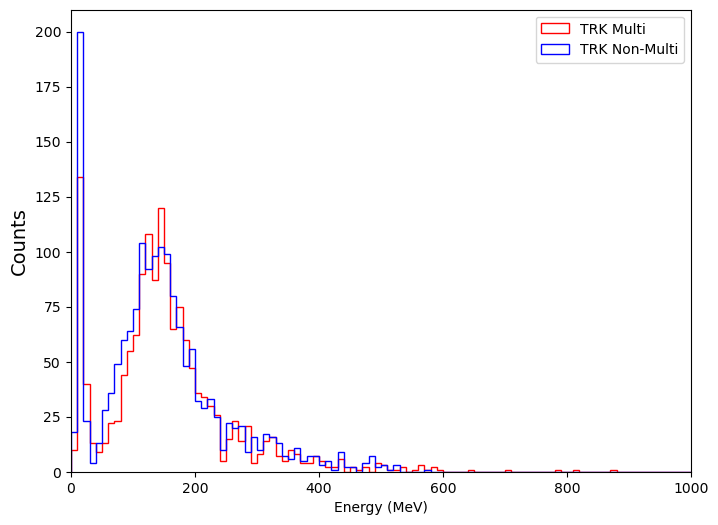

In [26]:
# Combined
plt.rcParams["figure.figsize"] = [8, 6]  
plt.hist(m_nrg, bins=100, range=(0.0, 1000.0), label='TRK Multi', histtype = 'step',color='red')
plt.hist(nm_nrg, bins=100, range=(0.0, 1000.0), label='TRK Non-Multi', histtype = 'step',color='blue')
plt.xlim(0,1000)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts", size=14)
plt.legend()
plt.savefig(f"temp_1.jpeg")

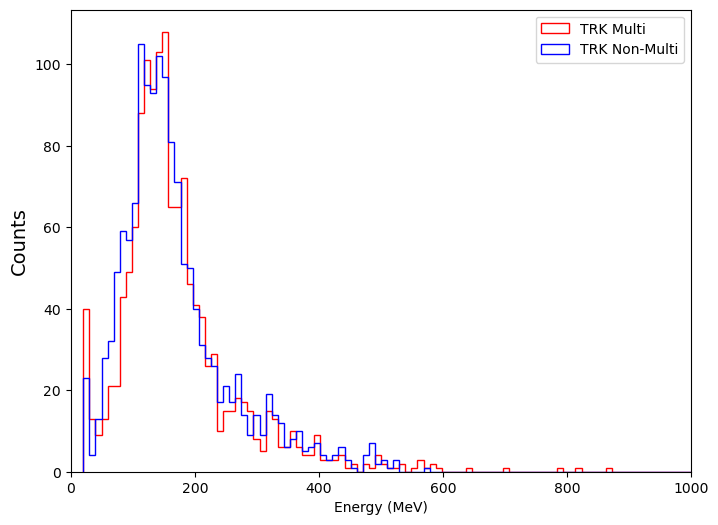

In [29]:
# Combined
plt.rcParams["figure.figsize"] = [8, 6]  
plt.hist(m_nrg, bins=100, range=(20.0, 1000.0), label='TRK Multi', histtype = 'step',color='red')
plt.hist(nm_nrg, bins=100, range=(20.0, 1000.0), label='TRK Non-Multi', histtype = 'step',color='blue')
plt.xlim(0,1000)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts", size=14)
plt.legend()
plt.savefig(f"temp_1.jpeg")

# CUD level

In [125]:
temp = f_data['m_cud']
m_cud = h5py.File(temp,'r')

In [126]:
temp = f_data['nm_cud']
nm_cud = h5py.File(temp,'r')

In [130]:
m_cud['Events/TKR/EventID']

<HDF5 dataset "EventID": shape (14037,), type "<u4">

In [131]:
nm_cud['Events/TKR/EventID']

<HDF5 dataset "EventID": shape (9027,), type "<u4">

In [106]:
m_cud_nrg = m_cud['Events/TKR/Energy'][...]
m_cud_nrg.shape

(1451, 6)

In [132]:
nm_cud_nrg = nm_cud['Events/TKR/Energy'][...]
nm_cud_nrg.shape

(9027, 10, 2, 192)

### Align the events. (n_events x nrg.)

need unique id.
and then have id, nrg

In [166]:
nrg_id = m_cud_nrg[:,0]
unique_nrgid, indices, counts = np.unique(nrg_id, return_index=True, return_counts=True)

In [167]:
unique_nrgid.shape

(695,)

In [168]:
evt_id = m_cud['Events/TKR/EventID'][...]
new_energy_ar = np.zeros(shape=(evt_id.shape[0],max(counts)))
new_energy_ar.shape

(14037, 11)

In [175]:
for i in range(unique_nrgid.shape[0]):
    tid = unique_nrgid[i]
    t_loc = np.where(nrg_id ==tid)
    t_loc1 = np.where(tid == evt_id)
    
    t_nrg= m_cud_nrg[t_loc[0],4]
#     print(len(t_nrg))
    for j in range(len((t_loc[0]))):
        print(t_nrg[j])
        new_energy_ar[t_loc1[0],j] = t_nrg[j]
        print(new_energy_ar[t_loc1[0]])
#     print(t_loc.shape, t_loc1.shape)
#     new_energy_ar[t_loc1[0],:] = m_cud_nrg[t_loc[0],4] 
#     print(len(t_loc[0]))
    

141.78459999999998
[[141.7846   42.64395   0.        0.        0.        0.        0.
    0.        0.        0.        0.     ]]
42.643950000000004
[[141.7846   42.64395   0.        0.        0.        0.        0.
    0.        0.        0.        0.     ]]
260.82675
[[260.82675   0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.     ]]
116.62209999999999
[[116.6221   67.4118  113.5776  193.05455 133.4705  156.6539   98.42885
    0.        0.        0.        0.     ]]
67.4118
[[116.6221   67.4118  113.5776  193.05455 133.4705  156.6539   98.42885
    0.        0.        0.        0.     ]]
113.57759999999999
[[116.6221   67.4118  113.5776  193.05455 133.4705  156.6539   98.42885
    0.        0.        0.        0.     ]]
193.05455
[[116.6221   67.4118  113.5776  193.05455 133.4705  156.6539   98.42885
    0.        0.        0.        0.     ]]
133.47050000000002
[[116.6221   67.4118  113.5776  193.05455 133.4705  156.6539   98.42885
    0.  

62.503299999999996
[[62.5033  0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]]
283.36465000000004
[[283.36465 210.53685 118.47965   0.        0.        0.        0.
    0.        0.        0.        0.     ]]
210.53685
[[283.36465 210.53685 118.47965   0.        0.        0.        0.
    0.        0.        0.        0.     ]]
118.47964999999999
[[283.36465 210.53685 118.47965   0.        0.        0.        0.
    0.        0.        0.        0.     ]]
238.29630000000003
[[238.2963   0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.    ]]
211.31525
[[211.31525   0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.     ]]
302.33065
[[302.33065   0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.     ]]
15.80055
[[15.80055  0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.     ]]
202.6286
[[202.6286   0.       0.      

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Test the ZPos check

In [2]:
test_file = "/Users/swasti/code/test_temp/delme/2023-02-14_0932_9Layers_Cs137_L3.h5"
tfile = h5py.File(test_file,'r')

In [3]:
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

In [9]:
zpos = tfile['tracker/energy'][:,3]

In [22]:
zpos = np.array(zpos)
zunique = np.unique(zpos)

In [28]:
val = np.zeros(zunique.shape[0])
for i in range(zunique.shape[0]):
    tval = np.count_nonzero(zpos == zunique[i])
    val[i]=tval


In [29]:
val

array([276., 214., 183., 179., 126., 112., 102., 139.,  96.])

In [36]:
labels = ['1','2','3','4','5','6','7','8','9']

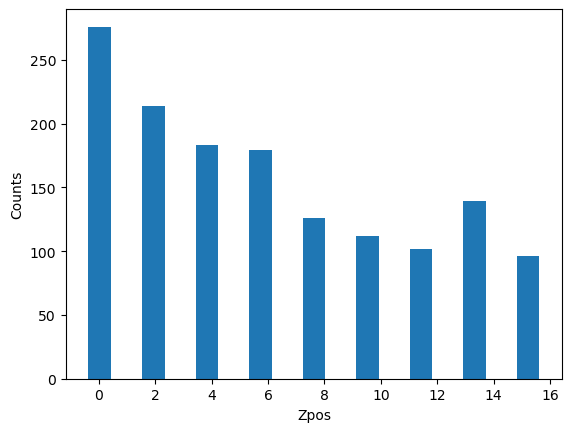

In [40]:
plt.bar(zunique,val)
plt.xlabel('Zpos')
plt.ylabel('Counts')
plt.savefig(f"counts_zpos.jpeg")